# CIFAR 10

21 Jan 2018

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

You can get thed ata via:
```
wget http://pjreddie.com/media/files/cifar.tgz
```

In [3]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH, exist_ok=True)

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [15]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [16]:
bs=256

## Look at dem der data

In [17]:
data = get_data(32, 4)

In [18]:
x,y = next(iter(data.trn_dl))

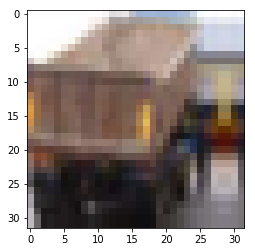

In [19]:
plt.imshow(data.trn_ds.denorm(x)[0]);

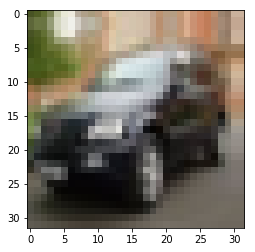

In [25]:
plt.imshow(data.trn_ds.denorm(x)[3]);

## Fully Connected Model

In [28]:
data = get_data(32,bs)

In [29]:
lr=1e-2

From [this notebook](https://github.com/KeremTurgutlu/deeplearning/blob/master/Exploring%20Optimizers.ipynb) by K.Turgutlu.

In [30]:
class SimpleNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(layers[i], layers[i+1]) for i in range(len(layers) - 1)])
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for λ in self.layers:
            λ_x = λ(x)
            x = F.relu(λ_x)
        return F.log_softmax(λ_x, dim=-1)

In [32]:
learn = ConvLearner.from_model_data(SimpleNet([32*32*3, 40, 10]), data)

In [33]:
learn, [o.numel() for o in learn.model.parameters()]

(SimpleNet(
   (layers): ModuleList(
     (0): Linear(in_features=3072, out_features=40)
     (1): Linear(in_features=40, out_features=10)
   )
 ), [122880, 40, 400, 10])

In [35]:
[o for o in learn.model.parameters()]

[Parameter containing:
 -6.4338e-03  1.5326e-02 -1.5924e-02  ...   1.1547e-02 -9.0885e-03 -1.4649e-02
  7.7094e-03 -1.0558e-02 -8.9114e-03  ...   2.8448e-03  1.5704e-02  3.5775e-03
 -9.6430e-03  6.4865e-03 -1.5673e-02  ...  -4.0456e-03  1.0989e-03  1.1022e-02
                 ...                   ⋱                   ...                
  2.1720e-03 -7.6407e-03 -4.6671e-03  ...  -1.9418e-03 -3.6204e-03 -1.0774e-02
  7.8809e-03 -1.6233e-02  1.1299e-02  ...   1.7158e-03  1.6630e-02 -3.0536e-03
  1.6010e-02  1.0412e-02  8.9523e-03  ...  -1.0815e-02  9.0351e-03  5.6351e-04
 [torch.cuda.FloatTensor of size 40x3072 (GPU 0)], Parameter containing:
 1.00000e-02 *
   1.1818
   0.4050
  -0.6216
   0.3488
  -0.8495
  -1.0857
  -0.7687
   1.5006
   1.2637
   0.8516
  -1.4815
   1.3691
  -1.2252
  -1.6819
   0.5080
  -0.5053
  -1.0665
  -1.2321
   0.4002
   0.8097
  -0.9507
   1.3731
   1.7077
   1.0292
   0.6423
  -1.4595
  -0.5423
   1.3911
   0.3411
   1.4390
  -0.4499
  -1.2129
   1.6920
   1.4